# Data Import

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.font_manager as fm
import matplotlib
import itertools

In [56]:
fm.get_fontconfig_fonts()
font_location = 'C:\\WINDOWS\\Fonts\\malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_4324\2582751676.py:1: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [57]:
FILES_DIR = '../data/a1/'
log_df = pd.read_csv(FILES_DIR + 'log_csv.csv')

In [58]:
log = log_df.copy()
log

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...,...
5659536,5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [59]:
# null값들을 un_** 으로 채워서 확인해보기
log_drop_null = log
log_drop_null['geoip_city_name'].fillna('un_city_name', inplace = True)
log_drop_null['category3'].fillna('un_category', inplace = True)
log_drop_null['uid'].fillna('un_name', inplace = True)
log_drop_null.dropna(axis = 0, inplace = True)
print(log_drop_null.isnull().sum().sort_values(ascending=False)) # null값 퍼센트로 표현

Unnamed: 0         0
uid                0
action_type        0
category1          0
category2          0
category3          0
collect_time       0
geoip_city_name    0
useragent_os       0
viewrate           0
viewtime           0
dtype: int64


# Log Analysis

In [60]:
log_drop_null

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...,...
5659536,5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [61]:
basket_hour = log_drop_null.loc[log_drop_null['action_type'] == 'Basket']
basket_hour

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
5,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
32,32,tqzAY2DMOxsADYls,Basket,패브릭,러그·카페트,극세사·단모러그,2022-12-29 11:00:45,Mapo-gu,Windows,0.0,0
82,82,2pFxQ2OtB9YADV3E,Basket,수납·정리,옷정리·이불정리,서랍칸막이·수납함,2022-12-29 12:43:21,Seoul,Windows,0.0,0
87,87,Dj8PAV/W7asADnq1,Basket,가구,소파,일반소파,2022-12-29 11:48:43,Gangnam-gu,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5659426,5659426,DieEzGOr/CoAC8gg,Basket,패브릭,매트리스커버,un_category,2022-12-28 22:36:19,Seoul,Mac OS X,0.0,0
5659444,5659444,0/15ImMIN1MAA8Hj,Basket,주방용품,주방수납·정리,주방선반·정리대,2022-12-29 10:27:10,Gwangju,Windows,0.0,0
5659496,5659496,09ocl2GmwHMACxrF,Basket,주방용품,그릇·홈세트,접시·플레이트,2022-12-28 15:30:03,Seoul,Windows,0.0,0
5659532,5659532,cLkIu2OXMw8AA9Dr,Basket,주방용품,주방수납·정리,홀더,2022-12-28 22:14:15,Haman,Windows,0.0,0


In [62]:
basket_hour["action_type"] = np.where((basket_hour['action_type'] == 'Basket'), 1,0)

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_4324\1352134481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket_hour["action_type"] = np.where((basket_hour['action_type'] == 'Basket'), 1,0)


In [63]:
uid_df = pd.DataFrame({'count': basket_hour.groupby(['uid', 'category1']).size()})
uid_df = uid_df.reset_index()
uid_df.sort_values(by='count', ascending=False)

,uid,category1,count
44712,d8NU6WLTwpsABiu3,주방용품,233
26959,J3hahWOoaWwACu2M,유아·아동,136
44713,d8NU6WLTwpsABiu3,캠핑용품,129
32656,OxOIoF8C8mcAAgUs,생활용품,120
15277,3HqgCmN0My4ADcBK,주방용품,113
...,...,...,...
17425,3afBZGOfOO4AA8JS,패브릭,1
17422,3af7GmKXH6EADcL5,생활용품,1
41974,cN69WmLiL0QABxW8,데코·식물,1
17421,3af6sGHmOIAABQiw,패브릭,1


In [64]:
uid_info = uid_df

In [65]:
user_info = basket_hour.groupby('uid')['category1'].count()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

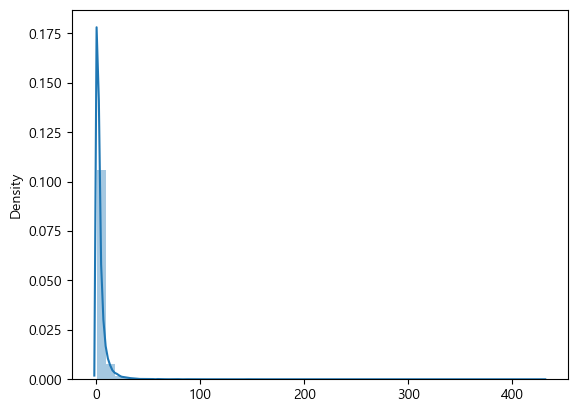

In [66]:
sns.distplot(user_info.values)

In [67]:
cat_df = pd.DataFrame({'count': basket_hour.groupby(['category1', 'uid']).size()})
cat_df = cat_df.reset_index()
cat_df.sort_values(by='count', ascending=False)

,category1,uid,count
54924,주방용품,d8NU6WLTwpsABiu3,233
46223,유아·아동,J3hahWOoaWwACu2M,136
58220,캠핑용품,d8NU6WLTwpsABiu3,129
34583,생활용품,OxOIoF8C8mcAAgUs,120
51251,주방용품,3HqgCmN0My4ADcBK,113
...,...,...,...
32376,생활용품,0zp9RmMj8OgAAN8m,1
32379,생활용품,0zqoQGOoLLkAAv65,1
32380,생활용품,0zr0o2Ohd+YABQs1,1
32381,생활용품,0zr3t2Or0HwAD0Gu,1


In [68]:
cat_df = pd.DataFrame({
    'cat_count': basket_hour.groupby('category1')['uid'].count()
})
cat_df = cat_df.reset_index()
print(cat_df.shape)
print(cat_df)

(48, 2)
                  category1  cat_count
0               Decor Plant         14
1   Home Appliances Digital          6
2           Household goods          2
3     Storage, organization          9
4                 Tool, DIY          1
5           daily necessity          1
6                    fabric         12
7                 furniture         96
8              infant child          5
9          kitchen utensils         94
10                    light          1
11  Đồ gia dụng Kỹ thuật số          1
12                   мебель          5
13                   ファブリック          2
14                     伴侶動物          7
15                        光          3
16                     厨房用具         22
17                    存储、组织          6
18                    存儲、組織          2
19                       家具          6
20                     家庭用品          2
21                    家电 数码          8
22                    幼児・児童          1
23                     廚房用具          1
24               

In [69]:
cat_df.sort_values(by='cat_count', ascending=False)

,category1,cat_count
29,가구,46143
45,주방용품,27667
47,패브릭,25072
38,수납·정리,14957
33,데코·식물,14599
37,생활용품,13539
31,가전·디지털,8741
44,조명,4750
32,공구·DIY,3493
36,생필품,2352


In [70]:
cat_df['cat_count'].describe()

count       48.000000
mean      3477.395833
std       8855.164993
min          1.000000
25%          2.000000
50%         10.500000
75%       1096.000000
max      46143.000000
Name: cat_count, dtype: float64

In [71]:
# 중위값으로 10.5로 해야하나 아니면 1000위로 해야하나...

cat_avg_up = cat_df[cat_df['cat_count'] > 1000].sort_values(by='cat_count', ascending=False)
cat_avg_up

,category1,cat_count
29,가구,46143
45,주방용품,27667
47,패브릭,25072
38,수납·정리,14957
33,데코·식물,14599
37,생활용품,13539
31,가전·디지털,8741
44,조명,4750
32,공구·DIY,3493
36,생필품,2352


In [72]:
cat_avg_up_list = list(set(cat_avg_up['category1']))
len(cat_avg_up_list)

14

In [73]:
cat_isin = basket_hour[basket_hour['category1'].isin(cat_avg_up_list)]
cat_isin

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
1,1,0+5vEmGkOuAAB5j2,1,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
5,5,091fXGIDYFEABcpA,1,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
32,32,tqzAY2DMOxsADYls,1,패브릭,러그·카페트,극세사·단모러그,2022-12-29 11:00:45,Mapo-gu,Windows,0.0,0
82,82,2pFxQ2OtB9YADV3E,1,수납·정리,옷정리·이불정리,서랍칸막이·수납함,2022-12-29 12:43:21,Seoul,Windows,0.0,0
87,87,Dj8PAV/W7asADnq1,1,가구,소파,일반소파,2022-12-29 11:48:43,Gangnam-gu,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5659426,5659426,DieEzGOr/CoAC8gg,1,패브릭,매트리스커버,un_category,2022-12-28 22:36:19,Seoul,Mac OS X,0.0,0
5659444,5659444,0/15ImMIN1MAA8Hj,1,주방용품,주방수납·정리,주방선반·정리대,2022-12-29 10:27:10,Gwangju,Windows,0.0,0
5659496,5659496,09ocl2GmwHMACxrF,1,주방용품,그릇·홈세트,접시·플레이트,2022-12-28 15:30:03,Seoul,Windows,0.0,0
5659532,5659532,cLkIu2OXMw8AA9Dr,1,주방용품,주방수납·정리,홀더,2022-12-28 22:14:15,Haman,Windows,0.0,0


In [74]:
cat_uid = pd.DataFrame({'count': cat_isin.groupby(['uid', 'category1']).size()})
cat_uid = cat_uid.reset_index()
cat_uid = cat_uid.sort_values(by='count', ascending=False)
cat_uid = cat_uid.iloc[:1000]
cat_uid

,uid,category1,count
44435,d8NU6WLTwpsABiu3,주방용품,233
26792,J3hahWOoaWwACu2M,유아·아동,136
44436,d8NU6WLTwpsABiu3,캠핑용품,129
32451,OxOIoF8C8mcAAgUs,생활용품,120
15191,3HqgCmN0My4ADcBK,주방용품,113
...,...,...,...
45729,dCwTJ2KnHBsABiRh,데코·식물,12
2171,02n1ZmEwsbAAC7Uy,생활용품,12
53481,eaSCE2IrDHUADZAe,수납·정리,12
28633,OkFztWOmcX4ACVpR,주방용품,12


uid별 set을 한다음에 uid별로 어떤걸 cat을 basket을 한것을 찾아보자

# 추천시스템 맛보기

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.sparse import csr_matrix

In [76]:
log = log_drop_null[['uid', 'category1', 'action_type']]

In [77]:
log

,uid,category1,action_type
0,avpKyWMn/xEADNlb,주방용품,View
1,0+5vEmGkOuAAB5j2,패브릭,Basket
2,r8DXy2OtSl8AAojG,패브릭,View
3,dC9Fl2Ly9lcADrTn,데코·식물,Highlight
4,09gKcGLg0I8ACyQy,가구,View
...,...,...,...
5659536,PUpxWWMWdcIACR2B,주방용품,View
5659537,PVMstmNg4I4ADq9R,가구,Basket
5659538,diRXdmN49dUABrVo,가구,View
5659539,dusFzWJvp5cADhZW,가전·디지털,View


In [78]:
log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5657112 entries, 0 to 5659540
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   uid          object
 1   category1    object
 2   action_type  object
dtypes: object(3)
memory usage: 172.6+ MB


In [79]:
log['basket'] = log.action_type
log.drop(columns = ['action_type'], inplace = True)

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_4324\2538592705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log['basket'] = log.action_type
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_4324\2538592705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log.drop(columns = ['action_type'], inplace = True)


In [80]:
re_name = {'basket' : {'View':0, 'Highlight':0, 'Basket':1, 'Copy':0, 'SINF':0}}
log = log.replace(re_name)

## 데이터 셋 나누기

In [81]:
train_df, test_df = train_test_split(log, test_size=0.2, random_state=42)

In [82]:
print(train_df.shape)
print(test_df.shape)

(4525689, 3)
(1131423, 3)


In [83]:
# 집합 A - 집합 B => 집합 B에는 없고 집합 A에만 있는 

# user
print("사용자: ",len(list(set(test_df['uid'].unique()) - set(train_df['uid'].unique()))))

# movieId
print("카테고리: ", len(list(set(test_df['category1'].unique()) - set(train_df['category1'].unique()))))
print("test set의 전체 카테고리 수: ",  len(test_df['category1'].unique()))

사용자:  85825
카테고리:  101
test set의 전체 카테고리 수:  2315


In [84]:
uid_not_included = list(set(test_df['uid'].unique()) - set(train_df['uid'].unique()))
print(sorted(uid_not_included)[:10])

not_included_df = test_df[test_df.uid.isin(uid_not_included)].sort_values(by='uid')
print(not_included_df.head(10))

print("train set에 없고, test set에만 있는 uid 데이터 수: ", not_included_df.shape)

['0++Nn2OoX4kAAREq', '0+0E1GOlousACRFf', '0+0bBWLOFIMAC5pt', '0+0bCmIYmmEAC9DS', '0+0bCmJ9xigAACMb', '0+0bCmJw3ZoAB1DI', '0+0bCmNWMP4AAIxQ', '0+19W2FjnogACX39', '0+1UamOtrTcAAhLU', '0+1nEmJdb8wAAOpb']
                      uid category1  basket
3027726  0++Nn2OoX4kAAREq     데코·식물       0
4733736  0+0E1GOlousACRFf    가전·디지털       0
2728550  0+0bBWLOFIMAC5pt        가구       0
4510639  0+0bCmIYmmEAC9DS        식품       0
858026   0+0bCmJ9xigAACMb        가구       0
3802473  0+0bCmJw3ZoAB1DI        식품       0
4648879  0+0bCmNWMP4AAIxQ    공구·DIY       0
1046409  0+19W2FjnogACX39       노하우       0
5158786  0+1UamOtrTcAAhLU       패브릭       0
4302893  0+1nEmJdb8wAAOpb       노하우       0
train set에 없고, test set에만 있는 uid 데이터 수:  (92709, 3)


In [85]:
cat_not_included = list(set(test_df['category1'].unique()) - set(train_df['category1'].unique()))
print(sorted(cat_not_included)[:10])

not_included_df = test_df[test_df.category1.isin(cat_not_included)].sort_values(by='category1')
print(not_included_df.head(10))

print("train set에 없고, test set에만 있는 cat 데이터 수: ", not_included_df.shape)

[' 한샘', '5월의일상', 'BPBL', 'GDK', 'Samsung', 'electrodomésticos digital', 'qualy', 'white goods', 'Ноу-хау ', 'キッチンウエア']
                      uid category1  basket
108104   PUpcLGMhfvQADrTS        한샘       0
2612123  PUpcLGMhfvQADrTS        한샘       0
4365345  t2EqHWLyhUYACe/V     5월의일상       0
654256   3ZKzHmEDmJoADPBc      BPBL       0
1965002  eYYdVWN7OkMACxq5       GDK       0
990729   eYYdVWN7OkMACxq5       GDK       0
2984558  eYYdVWN7OkMACxq5       GDK       0
2565945  bizoF2OhX/YACGRI   Samsung       0
1671836  bizoF2OhX/YACGRI   Samsung       0
3163405  bizoF2OhX/YACGRI   Samsung       0
train set에 없고, test set에만 있는 cat 데이터 수:  (121, 3)


In [86]:
ratings_range = np.arange(0, 2, step=1)
ratings_range

array([0, 1])

## train, test 에 없는 데이터들 랜덤

In [87]:
import random
pred_random = [random.choice(ratings_range) for x in range(len(test_df))]
pred_random[:10]

[0, 1, 1, 0, 0, 1, 1, 1, 1, 0]

In [88]:
test_df['pred_ratings_random'] = pred_random

In [89]:
mse = mean_squared_error(y_true=test_df['basket'].values, y_pred=test_df['pred_ratings_random'].values)
rmse = np.sqrt(mse)

print(mse, rmse)

0.5007667335735618 0.7076487360078881


## cat1 기반

In [90]:
train_cat_df = train_df.groupby('category1').mean()

print(train_cat_df.shape)
print(train_cat_df.head())

(3272, 1)
            basket
category1         
&tradition     0.0
(주)씨밀렉스코리아     0.0
(주)아이비스코리아     0.0
(주)아이엠         0.0
0001           0.0


In [91]:
# train과 test데이터 차이 데이터 랜덤으로 체우기
def avg_rating_prediction(training_set, x):
    if x in training_set.index:
        pred_rating = training_set.loc[x]['basket']
    else:
        pred_rating = random.choice(ratings_range)
    return pred_rating

In [92]:
test_df['pred_cat'] = test_df['category1'].apply(lambda x: avg_rating_prediction(train_cat_df, x))

test_df.head()

,uid,category1,basket,pred_ratings_random,pred_cat
3595088,bgojimOqhQEACbYY,가전·디지털,0,0,0.016246
966238,0zPC5WOId8YABX08,가전·디지털,0,1,0.016246
2237030,t2umo2IVzewAAJiY,패브릭,0,1,0.038490
868149,AeM3zWOgVs4ABfZU,패브릭,0,0,0.038490
4828400,cJLHnmOuWO4AA50D,노하우,0,0,0.000000


In [93]:
mse = mean_squared_error(y_true=test_df['basket'].values, y_pred=test_df['pred_cat'].values)
rmse = np.sqrt(mse)

print(mse, rmse)

0.02861601347522317 0.16916268345951233


## uid 기반 

In [94]:
train_user_df = train_df.groupby('uid').mean()

print(train_user_df.shape)
print(train_user_df.head())

(742250, 1)
                    basket
uid                       
0++3ZGK1UAwAADb+  0.000000
0++N/mCM70sACRof  0.000000
0+0E1GJwuzsACQ83  0.000000
0+0E1GOjv/8ABjEM  0.000000
0+0E1GOo9foAB0Rq  0.333333


In [95]:
test_df['pred_rating_user'] = test_df['uid'].apply(lambda x: avg_rating_prediction(train_user_df, x))

test_df.head()

,uid,category1,basket,pred_ratings_random,pred_cat,pred_rating_user
3595088,bgojimOqhQEACbYY,가전·디지털,0,0,0.016246,0.0
966238,0zPC5WOId8YABX08,가전·디지털,0,1,0.016246,0.0
2237030,t2umo2IVzewAAJiY,패브릭,0,1,0.038490,0.0
868149,AeM3zWOgVs4ABfZU,패브릭,0,0,0.038490,0.0
4828400,cJLHnmOuWO4AA50D,노하우,0,0,0.000000,0.0


In [96]:
# train과 test데이터 차이 데이터 랜덤으로 체우기
def avg_rating_prediction(training_set, x):
    if x in training_set.index:
        pred_rating = training_set.loc[x]['basket']
    else:
        pred_rating = random.choice(ratings_range)
    return pred_rating

In [97]:
test_df['pred_uid'] = test_df['uid'].apply(lambda x: avg_rating_prediction(train_user_df, x))

test_df.head()

,uid,category1,basket,pred_ratings_random,pred_cat,pred_rating_user,pred_uid
3595088,bgojimOqhQEACbYY,가전·디지털,0,0,0.016246,0.0,0.0
966238,0zPC5WOId8YABX08,가전·디지털,0,1,0.016246,0.0,0.0
2237030,t2umo2IVzewAAJiY,패브릭,0,1,0.038490,0.0,0.0
868149,AeM3zWOgVs4ABfZU,패브릭,0,0,0.038490,0.0,1.0
4828400,cJLHnmOuWO4AA50D,노하우,0,0,0.000000,0.0,0.0


In [98]:
mse = mean_squared_error(y_true=test_df['basket'].values, y_pred=test_df['pred_uid'].values)
rmse = np.sqrt(mse)

print(mse, rmse)

0.0675760587060807 0.2599539549729542


## rule 기반

In [99]:
train_user_info_df = pd.DataFrame({
    'avg_ratings': train_df.groupby('uid')['basket'].mean(),
    'std_ratings': train_df.groupby('uid')['basket'].std(),
    'count_ratings': train_df.groupby('uid')['basket'].count()
}).fillna(0)

train_user_info_df

,avg_ratings,std_ratings,count_ratings
uid,,,
0++3ZGK1UAwAADb+,0.000000,0.000000,5
0++N/mCM70sACRof,0.000000,0.000000,2
0+0E1GJwuzsACQ83,0.000000,0.000000,3
0+0E1GOjv/8ABjEM,0.000000,0.000000,1
0+0E1GOo9foAB0Rq,0.333333,0.516398,6
...,...,...,...
zyaBomLbW6kABT4Y,0.054054,0.229243,37
zyaeLmOs57EACT8n,0.000000,0.000000,1
zyak/GLq3i0ACWBJ,0.000000,0.000000,4


In [100]:
min_count = train_user_info_df['count_ratings'].min()
max_count = train_user_info_df['count_ratings'].max()
avg_count = train_user_info_df['count_ratings'].mean()

train_user_info_df['weights'] = train_user_info_df['count_ratings'].apply(lambda x: (x-avg_count)/(max_count-min_count))

In [101]:
train_user_info_df

,avg_ratings,std_ratings,count_ratings,weights
uid,,,,
0++3ZGK1UAwAADb+,0.000000,0.000000,5,-7.371710e-06
0++N/mCM70sACRof,0.000000,0.000000,2,-2.752663e-05
0+0E1GJwuzsACQ83,0.000000,0.000000,3,-2.080833e-05
0+0E1GOjv/8ABjEM,0.000000,0.000000,1,-3.424494e-05
0+0E1GOo9foAB0Rq,0.333333,0.516398,6,-6.534024e-07
...,...,...,...,...
zyaBomLbW6kABT4Y,0.054054,0.229243,37,2.076141e-04
zyaeLmOs57EACT8n,0.000000,0.000000,1,-3.424494e-05
zyak/GLq3i0ACWBJ,0.000000,0.000000,4,-1.409002e-05


In [102]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(train_user_info_df)
df_normalized = pd.DataFrame(np_scaled, columns = train_user_info_df.columns, index=train_user_info_df.index)
df_normalized

,avg_ratings,std_ratings,count_ratings,weights
uid,,,,
0++3ZGK1UAwAADb+,0.000000,0.000000,0.000027,0.000027
0++N/mCM70sACRof,0.000000,0.000000,0.000007,0.000007
0+0E1GJwuzsACQ83,0.000000,0.000000,0.000013,0.000013
0+0E1GOjv/8ABjEM,0.000000,0.000000,0.000000,0.000000
0+0E1GOo9foAB0Rq,0.333333,0.730297,0.000034,0.000034
...,...,...,...,...
zyaBomLbW6kABT4Y,0.054054,0.324199,0.000242,0.000242
zyaeLmOs57EACT8n,0.000000,0.000000,0.000000,0.000000
zyak/GLq3i0ACWBJ,0.000000,0.000000,0.000020,0.000020


In [103]:
test_df['avg_ratings'] = test_df['uid'].apply(lambda x: df_normalized.loc[x]['avg_ratings'])
test_df

KeyError: 'bgojimOqhQEACbYY'

In [ ]:
mse = mean_squared_error(y_true=test_df['basket'].values, y_pred=test_df['avg_ratings'].values)
rmse = np.sqrt(mse)

print(mse, rmse)

## 컨텐츠기반 TF-IDF

In [112]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [106]:
log2 = log_drop_null.copy()

In [108]:
log2['basket'] = log2.action_type
re_name = {'basket' : {'View':0, 'Highlight':0, 'Basket':1, 'Copy':0, 'SINF':0}}
log2 = log2.replace(re_name)

In [119]:
log2 = log2[log2['action_type'] == 'Basket']

In [120]:
# get unique tag
# 카테고리나 uid를 이렇게 나눌수 있는거 아닌가?
cat_column = list(map(lambda x: x.split(','), log2['category1']))
unique_cats = list(set(list(map(lambda x: x.strip(), list([cat for sublist in cat_column for cat in sublist])))))

print(unique_cats)

['мебель', 'Đồ gia dụng Kỹ thuật số', '식품', '장식 소품', '食物', 'Tool', '유아·아동', 'daily necessity', 'fabric', '存储、组织', '가구', '幼児・児童', 'Home Appliances Digital', '家电 数码', '織物', 'Decor Plant', '廚房用具', '存儲、組織', '가전', '家具', '주방용품', '照明', '생필품', '렌탈', 'organization', '조명', 'ファブリック', 'Household goods', '생활용품', 'Storage', '伴侶動物', '반려동물', '家庭用品', '공구·DIY', '수납·정리', 'furniture', '光', '패브릭', '生活必需品', '캠핑용품', 'DIY', '가전·디지털', '厨房用具', '데코·식물', '실내운동', 'light', '装饰 植物', 'kitchen utensils', 'infant child', '인테리어시공']


In [121]:
total_uid_count = len(set(log2['uid']))
# key: tag, value: number of movies with such tag
cat_count_dict = dict.fromkeys(unique_cats)

for each_uid_tag_list in log2['category1']:
    for cat in each_uid_tag_list.split(","):
        if cat_count_dict[cat.strip()] == None:
            cat_count_dict[cat.strip()] = 1
        else:
            cat_count_dict[cat.strip()] += 1

cat_idf = dict()
for each_cat in cat_count_dict:
    cat_idf[each_cat] = np.log10(total_uid_count / cat_count_dict[each_cat])

cat_idf

{'мебель': 3.8972641113434485,
 'Đồ gia dụng Kỹ thuật số': 4.596234115679468,
 '식품': 1.5412382541503258,
 '장식 소품': 2.962765660099881,
 '食物': 4.119112860959805,
 'Tool': 4.596234115679468,
 '유아·아동': 1.561605659054147,
 'daily necessity': 4.596234115679468,
 'fabric': 3.5170528696318426,
 '存储、组织': 3.818082865295824,
 '가구': -0.06787171120025672,
 '幼児・児童': 4.596234115679468,
 'Home Appliances Digital': 3.818082865295824,
 '家电 数码': 3.693144128687524,
 '織物': 4.596234115679468,
 'Decor Plant': 3.4501060800012295,
 '廚房用具': 4.596234115679468,
 '存儲、組織': 4.2952041200154865,
 '가전': 4.596234115679468,
 '家具': 3.818082865295824,
 '주방용품': 0.15427204559093916,
 '照明': 4.2952041200154865,
 '생필품': 1.2247967982753665,
 '렌탈': 2.8558714261852236,
 'organization': 3.6419916062401425,
 '조명': 0.9195405060546009,
 'ファブリック': 4.2952041200154865,
 'Household goods': 4.2952041200154865,
 '생활용품': 0.46464752743965915,
 'Storage': 3.6419916062401425,
 '伴侶動物': 3.751136075665211,
 '반려동물': 1.4324765916975115,
 '家庭用品': 4.2

In [122]:
len(cat_idf.keys())

50

In [123]:
# Create movie representations
cat_representation = pd.DataFrame(columns=sorted(unique_cats), index=list(set(log2['uid'])))
for name, group in tqdm(log2.groupby(by='uid')):
    temp_list = list(map(lambda x: x.split(','), list(group['category1'])))
    temp_cat_list = list(set(list(map(lambda x: x.strip(), list([cat for sublist in temp_list for cat in sublist])))))

    dict_temp = {i: cat_idf[i.strip()] for i in temp_cat_list}
    row_to_add = pd.DataFrame(dict_temp, index=[group['uid'].values[0]])
    cat_representation.update(row_to_add)

cat_representation = cat_representation.sort_index(0)
cat_representation

100%|████████████████████████████████████████████████████████████████████████████| 39467/39467 [41:59<00:00, 15.66it/s]
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_4324\3669009922.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  cat_representation = cat_representation.sort_index(0)


,DIY,Decor Plant,Home Appliances Digital,Household goods,Storage,Tool,daily necessity,fabric,furniture,infant child,...,수납·정리,식품,실내운동,유아·아동,인테리어시공,장식 소품,조명,주방용품,캠핑용품,패브릭
0+0E1GOo9foAB0Rq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0+0WhGMpIZQABvrd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.42139,NaN,NaN,NaN,NaN,NaN,NaN,0.154272,NaN,NaN
0+0bBWJwbVkACg+Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0+0bBWLFM+8AC4TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154272,NaN,0.197045
0+0hPmOpHfQABLc0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ytEf/GOauqwABkGu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.42139,NaN,NaN,1.561606,NaN,NaN,0.919541,0.154272,1.592343,0.197045
ywpjRWMglBcAC53F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z+2nAl+gbvsAArCl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154272,NaN,NaN
z/RHUGONyzUAAJRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
print(cat_representation.shape)

(39467, 50)


### Cosine similarity

In [128]:
from sklearn.metrics.pairwise import cosine_similarity

def cos_sim_matrix(a, b):
    cos_sim = cosine_similarity(a, b)
    result_df = pd.DataFrame(data=cos_sim, index=[a.index])

    return result_df

In [132]:
cat_representation = cat_representation.fillna(0)

In [133]:
cs_df = cos_sim_matrix(cat_representation, cat_representation)
cs_df.head()

,0,1,2,3,4,5,6,7,8,9,...,39457,39458,39459,39460,39461,39462,39463,39464,39465,39466
0+0E1GOo9foAB0Rq,1.0,0.000000,0.0,0.000000,0.0,0.0,0.261756,1.0,1.0,0.0,...,0.000000,1.0,0.000000,0.0,0.000000,0.025847,1.0,0.000000,0.0,0.0
0+0WhGMpIZQABvrd,0.0,1.000000,0.0,0.211933,0.0,0.0,0.204544,0.0,0.0,0.0,...,0.056883,0.0,0.000000,0.0,0.939047,0.170888,0.0,0.343788,0.0,0.0
0+0bBWJwbVkACg+Z,0.0,0.000000,1.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.176945,0.0,0.000000,0.0,0.0
0+0bBWLFM+8AC4TR,0.0,0.211933,0.0,1.000000,0.0,0.0,0.965134,0.0,0.0,0.0,...,0.101999,0.0,0.144822,0.0,0.000000,0.095300,0.0,0.616464,0.0,0.0
0+0hPmOpHfQABLc0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.164479,0.0,0.000000,1.0,1.0


In [136]:
train_df, test_df = train_test_split(log, test_size=0.2, random_state=1234)

In [137]:
log

,uid,category1,basket
0,avpKyWMn/xEADNlb,주방용품,0
1,0+5vEmGkOuAAB5j2,패브릭,1
2,r8DXy2OtSl8AAojG,패브릭,0
3,dC9Fl2Ly9lcADrTn,데코·식물,0
4,09gKcGLg0I8ACyQy,가구,0
...,...,...,...
5659536,PUpxWWMWdcIACR2B,주방용품,0
5659537,PVMstmNg4I4ADq9R,가구,1
5659538,diRXdmN49dUABrVo,가구,0
5659539,dusFzWJvp5cADhZW,가전·디지털,0


In [138]:
test_userids = list(set(test_df.basket.values))
test_userids

[0, 1]

In [145]:
# result_df = pd.DataFrame()

# for user_id in tqdm(test_userids):
#     user_record_df = train_df.loc[train_df.uid == int(user_id), :]
    
#     user_sim_df = cs_df.loc[user_record_df['uid']]  # (n, 9742); n은 userId가 평점을 매긴 영화 수
#     user_rating_df = user_record_df[['basket']]  # (n, 1)
#     sim_sum = np.sum(user_sim_df.T.to_numpy(), -1)  # (9742, 1)
#     # print("user_id=", i, user_record_df.shape, user_sim_df.T.shape, user_rating_df.shape, sim_sum.shape)

#     prediction = np.matmul(user_sim_df.T.to_numpy(), user_rating_df.to_numpy()).flatten() / (sim_sum+1) # (9742, 1)

#     prediction_df = pd.DataFrame(prediction, index=cs_df.index).reset_index()
#     prediction_df.columns = ['uid', 'pred_rating']    
#     prediction_df = prediction_df[['uid', 'pred_rating']][prediction_df.movieId.isin(test_df[test_df.uid == user_id]['uid'].values)]

#     temp_df = prediction_df.merge(test_df[test_df.uid == user_id], on='uid')
#     result_df = pd.concat([result_df, temp_df], axis=0)



  0%|                                                                                            | 0/2 [00:04<?, ?it/s]


KeyError: 'uid'

In [144]:
# result_df.head(10)

,pred_rating,uid,category1,basket


In [ ]:
"""
카테고리 2를 태그로 치환해서 해보기
바스켓을 레이팅이라고 치환해서 해보기



"""